# Exemplo de agrupamento utilizando o *K-Means* em *Python*

Para o exemplo a seguir, será utilizado o dataset Iris

## Bibliotecas usadas no código



In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from scipy.stats import mode
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4

## Iniciando o dataframe a partir do dataset



In [418]:
iris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
iris.rename(columns={'sepal_length':'Comprimento da sépala',
                     'sepal_width':'Altura da sépala',
                     'petal_length':'Comprimento da pétala',
                     'petal_width':'Altura da pétala',
                     'species':'Espécie'}, 
                 inplace=True)
le = preprocessing.LabelEncoder()
le.fit(iris['Espécie'])
LabelEncoder()
iris['t_Espécie'] = le.transform(iris['Espécie'])
print(iris['t_Espécie'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: t_Espécie, Length: 150, dtype: int64


## Plot de alguns atributos em pares.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


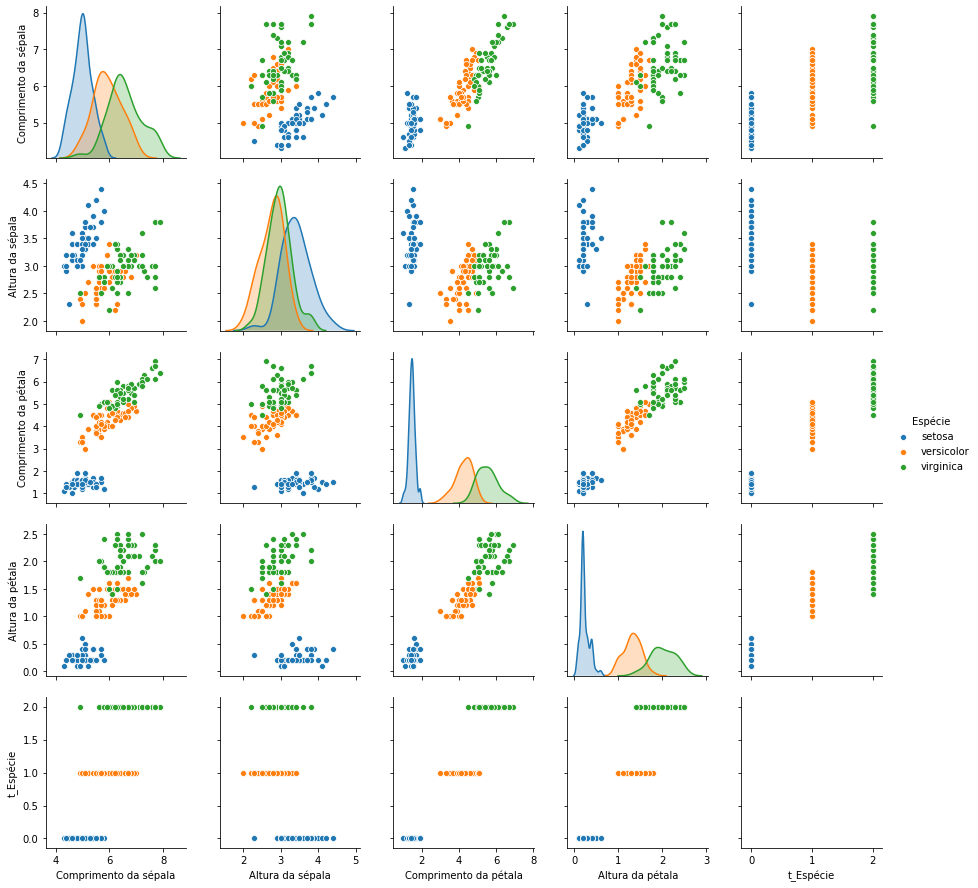

In [405]:
sns.pairplot(iris,hue='Espécie')

## Construindo e rodando o modelo

Algumas distâncias 
[[3.41925061 0.14694217 5.0595416 ]
 [3.39857426 0.43816892 5.11494335]
 [3.56935666 0.41230086 5.27935534]
 [3.42240962 0.51883716 5.15358977]
 [3.46726403 0.19796969 5.10433388]
 [3.14673162 0.68380699 4.68148797]
 [3.51650264 0.41520116 5.21147652]
 [3.33654987 0.0599333  5.00252706]
 [3.57233779 0.80099438 5.32798107]
 [3.3583767  0.36659514 5.06790865]]


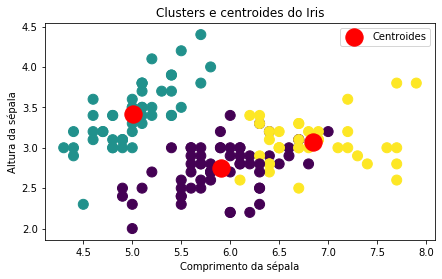

In [406]:
features = iris.iloc[:, 0:4].values #Armazena tudo menos a espécie / Equivalente a iris.data do dataset do sklearn
kmeans = KMeans(n_clusters = 3,random_state=5).fit(features)
iris['K-classes'] = kmeans.labels_
centroides = kmeans.cluster_centers_
distancia = kmeans.fit_transform(features)

print('Algumas distâncias ')
print(distancia[0:10,:])

plt.scatter(features[:, 0], features[:,1], s = 100, c = kmeans.labels_.astype(float))
plt.scatter(centroides[:, 0], centroides[:, 1], s = 300, c = 'red',label = 'Centroides')
plt.title('Clusters e centroides do Iris')
plt.xlabel('Comprimento da sépala')
plt.ylabel('Altura da sépala')
plt.legend()
plt.show()


## Outra forma de visualização

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



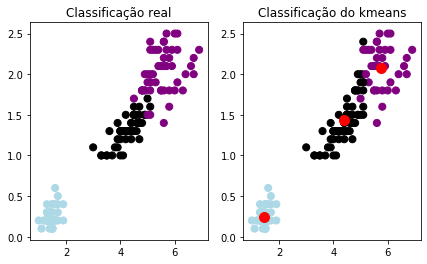

In [407]:
cores = np.array(['black','lightblue','purple'])
cores2 = np.array(['lightblue','black','purple'])
relabel = np.choose(kmeans.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=features[:,2], y= features[:,3], c=cores2[iris['t_Espécie']], s=50)
plt.title('Classificação real')


plt.subplot(1,2,2)
plt.scatter(x=features[:,2], y= features[:,3], c=cores[kmeans.labels_], s=50)
plt.scatter(x=centroides[:, 2], y= centroides[:, 3], s = 100, c = 'red',label = 'Centroides')
plt.title('Classificação do kmeans')

print(classification_report(iris['t_Espécie'],relabel))

plt.show()

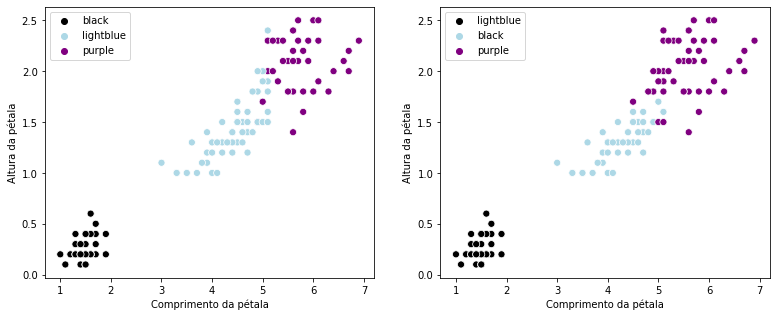

In [428]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
sns.scatterplot(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'],hue=cores[relabel], palette=cores, s=50, ax=ax[0])
sns.scatterplot(x=iris_df['Comprimento da pétala'],y=iris_df['Altura da pétala'],hue=cores2[iris['t_Espécie']], palette=cores, s=50, ax=ax[1])
fig.show()


## Principais métricas de classificação

In [409]:
print(classification_report(iris['t_Espécie'],relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [410]:
confusion_matrix(iris['t_Espécie'],kmeans.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

### Exemplo 2: dígitos no kmeans

Veremos agora uma aplicação do *k*-means em um dataset de dígitos. Aqui, iremos aplicar o *k*-means para tentar identificar dígitos semelhantes sem usar a informação dos rótulos iniciais.

Nós iremos começar carregando os digitos e encontrando os centróides dos clusters. Esses digitos consistem em mais ou menos 1800 amostrar com 64 características(``features``), sendo que essas 64 características seriam o brilho de um pixel em uma imagem 8x8

In [411]:
digits = load_digits()
digits.data.shape

(1797, 64)

## Clustering

In [426]:
kmeans_digitos = KMeans(n_clusters=10, random_state=0)
clusters = kmeans_digitos.fit_predict(digits.data)
kmeans_digitos.cluster_centers_.shape


(10, 64)

O resultado são 10 clusters em 64 dimensões.



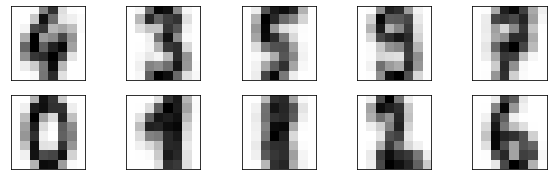

In [413]:
figura, axisx = plt.subplots(2, 5, figsize=(10, 3))
centers = kmeans_digitos.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(axisx.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que mesmo sem os rótulos, o `` KMeans`` é capaz de encontrar clusters cujos centros são dígitos reconhecíveis, talvez a exceção do 1 e 8.

In [423]:
labels = np.zeros_like(clusters)

for i in range(10):    
    mask = (clusters == i)    
    labels[mask] = mode(digits.target[mask])[0]


array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

## Principais métricas de classificação

In [415]:
print(classification_report(digits.target,labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.61      0.30      0.40       182
           2       0.85      0.84      0.84       177
           3       0.88      0.84      0.86       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.57      0.50       174
           9       0.56      0.77      0.65       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.81      0.79      0.79      1797



 ## Matriz de confusão

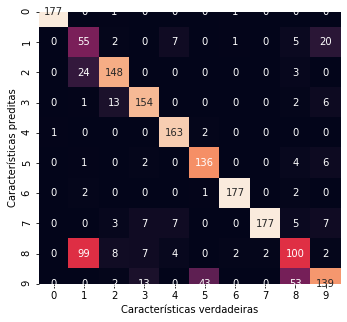





[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   6   0   6   0   7   2 139]]


In [417]:
mat = confusion_matrix(digits.target, labels)

_,axx = plt.subplots(figsize=(10,5)) 

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,ax=axx)

plt.xlabel('Características verdadeiras')
plt.ylabel('Características preditas');
plt.show()

print('\n'*3)
print(confusion_matrix(digits.target,labels))
